# pyfesom tutorial 

This is a short introduction to basic functionality of pyfesom. In order to be able to run it you have to have pyfesom itself and download sample data located in [this repository](https://github.com/FESOM/FESOM-data). The easiest way for now is to clone repositories:

    git clone https://github.com/FESOM/pyfesom.git
    git clone https://github.com/FESOM/FESOM-data.git
  

You have to add the path to pyfesom in to your system path, like this:

In [1]:
import sys
# example of the full path:
# sys.path.append('/home/myuser/pyfesom/')
sys.path.append("../")

And now you can import pyfesom (as pf) and the rest of nessesary modules:

In [3]:
import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
from matplotlib import cm

First we have to load the FESOM mesh. You just have to provide path to the directory where the mesh is stored. By default pyfesom will try to create a binary version of the mesh in the same directory, so it's important to have write permissions. In this example we will load very small, so called pi-mesh from the FESOM-data repository:

In [7]:
meshpath  ='../../FESOM-data/pi-grid/'
mesh = pf.load_mesh(meshpath)

/home/magik/FESOM-data/pi-grid/pickle_mesh
2
The usepickle == True
The pickle file for python 2 DO NOT exists
The mesh will be saved to /home/magik/FESOM-data/pi-grid/pickle_mesh
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Save mesh to binary format


You can get some basic information about the mesh:

In [8]:
mesh


FESOM mesh:
path                  = /home/magik/FESOM-data/pi-grid
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 3140
number of 2d elements = 5839
number of 3d nodes    = 93035

        

At first we are interested in four attributes of our mesh object:

    mesh.x2     - lon (x) coordinates
    mesh.y2     - lat (y) coordinates
    mesh.elem2  - 3d array, where each row have trhee indexes of the x and y. So, each row                    describes a triangle 
    mesh.voltri - 1 d array with areas of the triangles

Let's first try to have a look at the mesh:

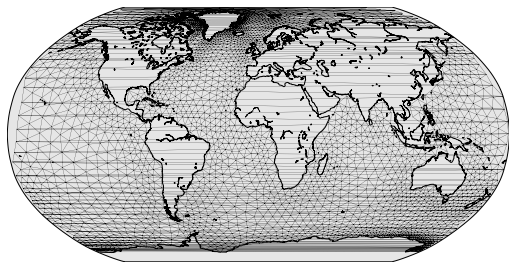

In [16]:
m = Basemap(projection='robin',lon_0=0, resolution='l')
x, y = m(mesh.x2, mesh.y2)
plt.figure(figsize=(9,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
plt.triplot(x, y, mesh.elem, lw=0.2,color='k');

Not exactly what we have expected, right? There is a simple way to get rid of this ugly lines crossing the continents - we have to select only so called non cyclic elements:

In [13]:
elem2=mesh.elem[mesh.no_cyclic_elem,:]

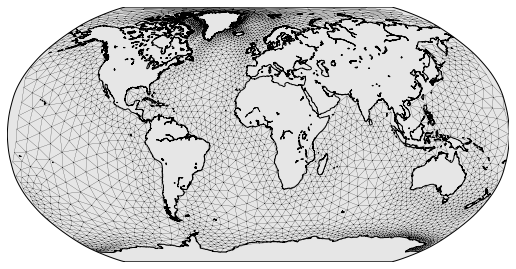

In [17]:
m = Basemap(projection='robin',lon_0=0, resolution='l')
x, y = m(mesh.x2, mesh.y2)
plt.figure(figsize=(9,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
plt.triplot(x, y, elem2, lw=0.2,color='k');

Much better!

Now, we would like to see how horizontal resolution is distributed in our mesh. For this we can use area information, but again we have to remove unwanted elements:

In [15]:
voltri = mesh.voltri[mesh.no_cyclic_elem]

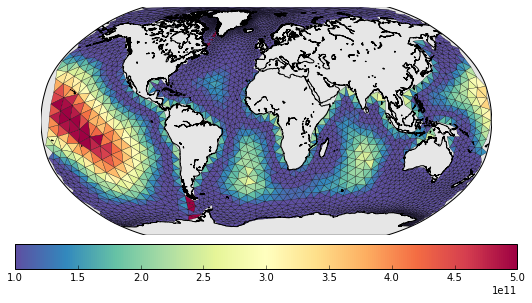

In [20]:
m = Basemap(projection='robin',lon_0=0, resolution='l')
x, y = m(mesh.x2, mesh.y2)
plt.figure(figsize=(9,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
plt.tripcolor(x, y, elem2, \
              facecolors=mesh.voltri[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r,
             vmin=0.1*1e12, vmax=0.5*1e12)
plt.colorbar(orientation='horizontal', pad=0.03);